In [1]:
from sklearn.datasets import make_regression, make_blobs
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [2]:
import sklearn as sk
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X, y = make_regression(n_samples=1000, n_features=1, n_informative=1, noise=3.0)

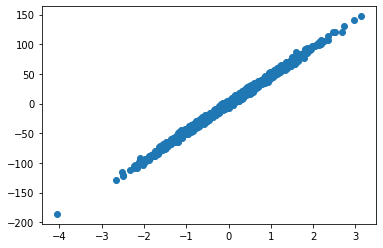

In [4]:
plt.scatter(X[:,0], y)

In [5]:
model = sk.linear_model.LinearRegression(normalize=True)

In [6]:
% time model.fit(X,y)

CPU times: user 3.15 ms, sys: 3.88 ms, total: 7.03 ms
Wall time: 20.7 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [8]:
%time ypred = model.predict(X)

CPU times: user 704 µs, sys: 357 µs, total: 1.06 ms
Wall time: 900 µs


In [9]:
mean_squared_error = sk.metrics.mean_squared_error(y_true=y, y_pred=ypred)

In [10]:
mean_squared_error

9.208625246852447

## Cross Validation

In [11]:
from sklearn.model_selection import KFold

In [12]:
kf = KFold(n_splits=5)

In [14]:
lrg = LinearRegression()
cv_score = []
model = LinearRegression()

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lrg.fit(X_train, y_train)
    ypred = lrg.predict(X_test)
    rmse_score = np.sqrt(metrics.mean_squared_error(y_test, ypred))
    
    cv_score.append(rmse_score)

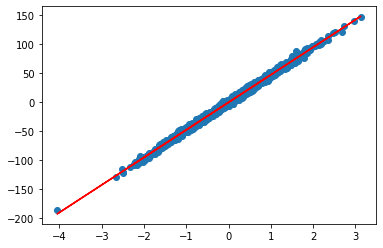

In [16]:
model = LinearRegression()
model.fit(X,y)
ypred = model.predict(X)
plt.scatter(X[:,0],y)
plt.plot(X[:,0], ypred, 'r')
plt.show()

### Classification

In [17]:
from sklearn import datasets

In [18]:
X, y = datasets.make_blobs(n_samples=300,
                          n_features=2,
                          centers=2,
                          random_state=1,
                          cluster_std=3)

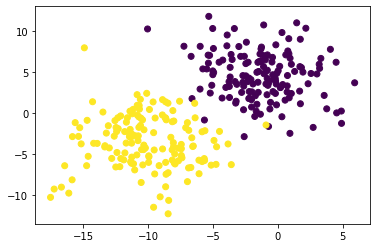

In [19]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [20]:
# Logistic Regression
clf = LogisticRegression()

In [21]:
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
ypred = clf.predict(X)

In [24]:
metrics.confusion_matrix(y, ypred)
# output is the TP, FP, TN, FN

array([[148,   2],
       [  1, 149]])

In [25]:
metrics.precision_score(y, ypred)

0.9867549668874173

In [26]:
metrics.recall_score(y, ypred)

0.9933333333333333

In [27]:
metrics.roc_auc_score(y,ypred)

0.9899999999999999

In [29]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
ypred = clf.predict(X)

In [31]:
print(metrics.recall_score(y,ypred))
print(metrics.precision_score(y,ypred))
print(metrics.f1_score(y,ypred))
print(metrics.roc_auc_score(y,ypred))

1.0
1.0
1.0
1.0


In [32]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'